In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler

warnings.filterwarnings('ignore')

#Import the training data from the file
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
#Credit for the following compute_cost function:
#Author: Hamed Tabkhi
#Institution: University of North Carolina at Charlotte, ECE dept.
#Accessed on: 9/17/2021
#From: "LinearRegression.pdf"
 
def compute_cost(X, y, theta, m):
 """
 Compute cost for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(1 x m)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 Output Parameters
 -----------------
 J : Scalar value.
 """
 predictions = X.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

In [3]:
#This cost function adds parameter penalties
def regularized_compute_cost(X, y, theta, m, lamda):
    """
    Compute cost for linear regression.
    Input Parameters
    ----------------
    X : 2D array where each row represent the training example and each column represent
    m= number of training examples
    n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(1 x m)
    theta : 1D array of fitting parameters or weights. Dimension (1 x n)
    Output Parameters
    lamda: Arbitrary scalar to determine the amount a parameter is penalized.
    -----------------
    J : Scalar value.
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    sqrThetas = (theta.transpose()).dot(theta)-np.square(theta[0])
    J = 1 / (2 * m) * (np.sum(sqrErrors)+lamda*sqrThetas)
    return J

In [4]:
#Credit for the following gradient_descent function:
#Author: Hamed Tabkhi
#Institution: University of North Carolina at Charlotte, ECE dept.
#Accessed on: 9/17/2021
#From: "LinearRegression.pdf"

def gradient_descent(X, y, theta, alpha, iterations):
 """
 Compute cost for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(m x 1)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 alpha : Learning rate. Scalar value
 iterations: No of iterations. Scalar value.
 Output Parameters
 -----------------
 theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
 cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
 """
 cost_history = np.zeros(iterations)
 for i in range(iterations):
     predictions = X.dot(theta)
     errors = np.subtract(predictions, y)
     sum_delta = (alpha / m) * X.transpose().dot(errors);
     theta = theta - sum_delta;
     cost_history[i] = compute_cost(X, y, theta)
 return theta, cost_history

In [5]:
#My version of the gradient_descent to accomadate a threshold instead of a fixed amount of iterations.
def new_gradient_descent(X, y, Xv, yv, theta, alpha, iterations_limit, threshold, m, k):
    """
    Compute cost for linear regression.
    Input Parameters
    ----------------
    X : 2D array where each row represent the training example and each column represent
    m= number of training examples
    n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(m x 1)
    theta : 1D array of fitting parameters or weights. Dimension (1 x n)
    alpha : Learning rate. Scalar value
    iterations_limit: Sets a maximum on how many iterations can be performed. Scalar value.
    threshold: Stops the descent once cost falls below this values. Scalar value.
    Output Parameters
    -----------------
    theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
    cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
    iterations: the total iterations of gradient descent accumulated. Scalar Values
    """
    iterations = 0
    deviation = 10000000 #Assume enourmous deviation(cost) to begin with
    cost_history = np.empty([0,1])
    validation_history = np.empty([0,1])
    
    while iterations<iterations_limit and deviation>threshold:
        oldTheta = theta;
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        
        theta = theta - sum_delta;
        cost_history = np.vstack((cost_history, compute_cost(X, y, theta, m)))
        validation_history = np.vstack((validation_history, compute_cost(Xv, yv, theta, k)))
        
        iterations+=1
        thetadiff = theta-oldTheta
        deviation = np.sqrt((thetadiff.transpose()).dot(thetadiff))
        #print(deviation)
    
    validation_history = validation_history.transpose()
    cost_history = cost_history.transpose()

    return theta, cost_history, iterations, validation_history

In [6]:
#This versions of gradient descent introduces parameter penalties
def regularized_gradient_descent(X, y, Xv, yv, theta, alpha, iterations_limit, threshold, m, k, lamda):
    """
    Compute cost for linear regression.
    Input Parameters
    ----------------
    X : 2D array where each row represent the training example and each column represent
    m= number of training examples
    n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(m x 1)
    theta : 1D array of fitting parameters or weights. Dimension (1 x n)
    alpha : Learning rate. Scalar value
    iterations_limit: Sets a maximum on how many iterations can be performed. Scalar value.
    threshold: Stops the descent once cost falls below this values. Scalar value.
    Output Parameters
    -----------------
    theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
    cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
    iterations: the total iterations of gradient descent accumulated. Scalar Values
    """
    iterations = 0
    deviation = 10000000 #Assume enourmous deviation(cost) to begin with
    cost_history = np.empty([0,1])
    validation_history = np.empty([0,1])
    
    while iterations<iterations_limit and deviation>threshold:
        oldTheta = theta;
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        
        theta = theta*(1-alpha*lamda/m) - sum_delta;
        #theta = theta - sum_delta;
            
        cost_history = np.vstack((cost_history, regularized_compute_cost(X, y, theta, m, lamda)))
        validation_history = np.vstack((validation_history, compute_cost(Xv, yv, theta, k)))
        
        iterations+=1
        thetadiff = theta-oldTheta
        deviation = np.sqrt((thetadiff.transpose()).dot(thetadiff))
        #print(deviation)
    
    validation_history = validation_history.transpose()
    cost_history = cost_history.transpose()

    return theta, cost_history, iterations, validation_history

In [7]:
# List of variables to map to numerical values from strings:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
           
# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
       
#Figure out how many datappoints are in the set:
m = len(housing)
print("Total number of data points:", m)

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

# Check the housing dataframe now
housing.head()


Total number of data points: 545


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [8]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respec
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state=4)
#df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state=np.random)

print("Shape of training set:", df_train.shape)
print("Shape of validation set:", df_test.shape)
m = len(df_train)
k = len(df_test)


Shape of training set: (381, 13)
Shape of validation set: (164, 13)


In [9]:
#Question 1 Part A
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

#Training Data:
x1A = df_Newtrain.values[:, 0] # get input values for area
x2A = df_Newtrain.values[:, 1] # get input values for bedrooms
x3A = df_Newtrain.values[:, 2] # get input values for bathroom
x4A = df_Newtrain.values[:, 3] # get input values for stories
x5A = df_Newtrain.values[:, 4] # get input values for parking
yA = df_Newtrain.values[:, 5] # get output values (price)
print(df_Newtrain.head(), "\n")

#Reshaping and adding a column of ones to represent the "variable" multiplied against theta0 for each input
X_0A = np.ones((m, 1))
X_1A = x1A.reshape(m, 1)
X_2A = x2A.reshape(m, 1)
X_3A = x3A.reshape(m, 1)
X_4A = x4A.reshape(m, 1)
X_5A = x5A.reshape(m, 1)
xA = np.hstack((X_0A, X_1A, X_2A, X_3A, X_4A, X_5A))
print(xA, "\n")

#Validation Data:
x1Av = df_Newtest.values[:, 0] # get input values for area
x2Av = df_Newtest.values[:, 1] # get input values for bedrooms
x3Av = df_Newtest.values[:, 2] # get input values for bathroom
x4Av = df_Newtest.values[:, 3] # get input values for stories
x5Av = df_Newtest.values[:, 4] # get input values for parking
yAv = df_Newtest.values[:, 5] # get output values (price)
print(df_Newtest.head(), "\n")

#Reshaping and adding a column of ones to represent the "variable" multiplied against theta0 for each input
X_0Av = np.ones((k, 1))
X_1Av = x1Av.reshape(k, 1)
X_2Av = x2Av.reshape(k, 1)
X_3Av = x3Av.reshape(k, 1)
X_4Av = x4Av.reshape(k, 1)
X_5Av = x5Av.reshape(k, 1)
xAv = np.hstack((X_0Av, X_1Av, X_2Av, X_3Av, X_4Av, X_5Av))
print(xAv, "\n")

     area  bedrooms  bathrooms  stories  parking    price
286  2787         3          1        1        0  4235000
477  4960         2          1        1        0  2940000
33   5960         3          3        2        1  8190000
475  3000         2          1        2        0  2961000
104  5500         3          2        1        2  6195000 

[[1.000e+00 2.787e+03 3.000e+00 1.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 4.960e+03 2.000e+00 1.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 5.960e+03 3.000e+00 3.000e+00 2.000e+00 1.000e+00]
 ...
 [1.000e+00 3.930e+03 2.000e+00 1.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 3.800e+03 3.000e+00 1.000e+00 2.000e+00 1.000e+00]
 [1.000e+00 6.254e+03 4.000e+00 2.000e+00 1.000e+00 1.000e+00]] 

      area  bedrooms  bathrooms  stories  parking    price
489   3300         3          1        2        1  2835000
302   2145         3          1        3        1  4200000
66   13200         2          1        1        1  6930000
270   4500         3        

Thetas for Question 1 Part A model = [2.37732796e-01 8.56732687e+02 7.98216333e-01 3.99977595e-01
 6.03759446e-01 2.09205705e-01]
Final number of iterations = 291 



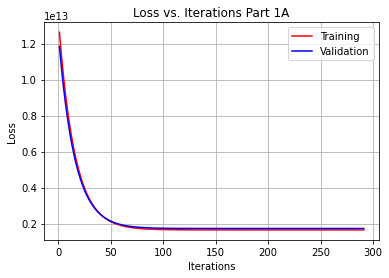

In [10]:
#Linear Regression for Q1A
thetaA = np.zeros(6)
iterations_limA = 10000
alphaA = 0.000000001
thresholdA = .003

thetaA, cost_historyA, iterateA, validation_historyA = new_gradient_descent(xA, yA, xAv, yAv, thetaA, alphaA, iterations_limA, thresholdA, m, k)
print('Thetas for Question 1 Part A model =', thetaA)
#print('cost_history for the first variable =', cost_historyA)
print('Final number of iterations =', iterateA, "\n")
#print(len(cost_history01.transpose()))

# Plotting the first variable of the training data with its regression line
plt.plot(range(1, iterateA + 1), cost_historyA.transpose(), color='red',label='Training')
plt.plot(range(1, iterateA + 1), validation_historyA.transpose(), color='blue',label='Validation')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations Part 1A')
plt.legend()

In [11]:
#Question 1 Part B
num_varsB = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_NewtrainB = df_train[num_varsB]
df_NewtestB = df_test[num_varsB]


#Training Data:
x1B = df_NewtrainB.values[:, 0] # get input values for area
x2B = df_NewtrainB.values[:, 1] # get input values for bedrooms
x3B = df_NewtrainB.values[:, 2] # get input values for bathroom
x4B = df_NewtrainB.values[:, 3] # get input values for stories
x5B = df_NewtrainB.values[:, 4] # get input values for mainroad
x6B = df_NewtrainB.values[:, 5] # get input values for guestroom
x7B = df_NewtrainB.values[:, 6] # get input values for basement
x8B = df_NewtrainB.values[:, 7] # get input values for hotwaterheating
x9B = df_NewtrainB.values[:, 8] # get input values for airconditioning
x10B = df_NewtrainB.values[:, 9] # get input values for parking
x11B = df_NewtrainB.values[:, 10] # get input values for prefarea
yB = df_NewtrainB.values[:, 11] # get output values (price)
print(df_NewtrainB.head(), "\n")

#Reshaping and adding a column of ones to represent the "variable" multiplied against theta0 for each input
X_0B = np.ones((m, 1))
X_1B = x1B.reshape(m, 1)
X_2B = x2B.reshape(m, 1)
X_3B = x3B.reshape(m, 1)
X_4B = x4B.reshape(m, 1)
X_5B = x5B.reshape(m, 1)
X_6B = x6B.reshape(m, 1)
X_7B = x7B.reshape(m, 1)
X_8B = x8B.reshape(m, 1)
X_9B = x9B.reshape(m, 1)
X_10B = x10B.reshape(m, 1)
X_11B = x11B.reshape(m, 1)
xB = np.hstack((X_0B, X_1B, X_2B, X_3B, X_4B, X_5B, X_6B, X_7B, X_8B, X_9B, X_10B, X_11B))
print(xB, "\n")

#Validation Data:
x1Bv = df_NewtestB.values[:, 0] # get input values for area
x2Bv = df_NewtestB.values[:, 1] # get input values for bedrooms
x3Bv = df_NewtestB.values[:, 2] # get input values for bathroom
x4Bv = df_NewtestB.values[:, 3] # get input values for stories
x5Bv = df_NewtestB.values[:, 4] # get input values for mainroad
x6Bv = df_NewtestB.values[:, 5] # get input values for guestroom
x7Bv = df_NewtestB.values[:, 6] # get input values for basement
x8Bv = df_NewtestB.values[:, 7] # get input values for hotwaterheating
x9Bv = df_NewtestB.values[:, 8] # get input values for airconditioning
x10Bv = df_NewtestB.values[:, 9] # get input values for parking
x11Bv = df_NewtestB.values[:, 10] # get input values for prefarea
yBv = df_NewtestB.values[:, 11] # get output values (price)
print(df_NewtestB.head(), "\n")

#Reshaping and adding a column of ones to represent the "variable" multiplied against theta0 for each input
X_0Bv = np.ones((k, 1))
X_1Bv = x1Bv.reshape(k, 1)
X_2Bv = x2Bv.reshape(k, 1)
X_3Bv = x3Bv.reshape(k, 1)
X_4Bv = x4Bv.reshape(k, 1)
X_5Bv = x5Bv.reshape(k, 1)
X_6Bv = x6Bv.reshape(k, 1)
X_7Bv = x7Bv.reshape(k, 1)
X_8Bv = x8Bv.reshape(k, 1)
X_9Bv = x9Bv.reshape(k, 1)
X_10Bv = x10Bv.reshape(k, 1)
X_11Bv = x11Bv.reshape(k, 1)
xBv = np.hstack((X_0Bv, X_1Bv, X_2Bv, X_3Bv, X_4Bv, X_5Bv, X_6Bv, X_7Bv, X_8Bv, X_9Bv, X_10Bv, X_11Bv))
print(xBv, "\n")


     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
286  2787         3          1        1         1          0         1   
477  4960         2          1        1         1          0         0   
33   5960         3          3        2         1          1         1   
475  3000         2          1        2         1          0         0   
104  5500         3          2        1         1          1         1   

     hotwaterheating  airconditioning  parking  prefarea    price  
286                0                0        0         1  4235000  
477                0                0        0         0  2940000  
33                 0                0        1         0  8190000  
475                0                0        0         0  2961000  
104                0                0        2         1  6195000   

[[1.000e+00 2.787e+03 3.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.000e+00 4.960e+03 2.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00

Thetas for Question 1 Part B model = [2.39141152e-01 8.56732474e+02 8.03665699e-01 4.03055481e-01
 6.08778882e-01 2.20049779e-01 6.71126213e-02 1.28670573e-01
 2.39071026e-02 1.40272713e-01 2.10618983e-01 7.78088239e-02]
Final number of iterations = 2952 



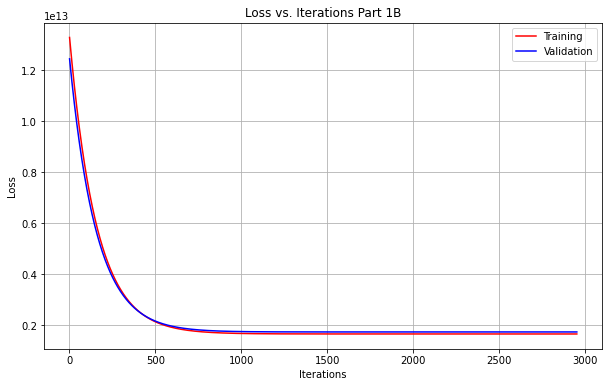

In [12]:
#Linear Regression for Q1B
thetaB = np.zeros(12)
iterations_limB = 10000
alphaB = 0.0000000001
thresholdB = .0003
thetaB, cost_historyB, iterateB, validation_historyB = new_gradient_descent(xB, yB, xBv, yBv, thetaB, alphaB, iterations_limB, thresholdB, m, k)
print('Thetas for Question 1 Part B model =', thetaB)
#print('cost_history for the first variable =', cost_historyA)
print('Final number of iterations =', iterateB, "\n")
#print(len(cost_history01.transpose()))

# Plotting the first variable of the training data with its regression line
plt.plot(range(1, iterateB + 1), cost_historyB.transpose(), color='red',label='Training')
plt.plot(range(1, iterateB + 1), validation_historyB.transpose(), color='blue',label='Validation')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations Part 1B')
plt.legend()

In [13]:
#Question 2 Part A Normalized

scaler1 = MinMaxScaler()
df_Newtrain[num_vars] = scaler1.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = scaler1.transform(df_Newtest[num_vars])

#Training Data:
x1A = df_Newtrain.values[:, 0] # get input values for area
x2A = df_Newtrain.values[:, 1] # get input values for bedrooms
x3A = df_Newtrain.values[:, 2] # get input values for bathroom
x4A = df_Newtrain.values[:, 3] # get input values for stories
x5A = df_Newtrain.values[:, 4] # get input values for parking
yA = df_Newtrain.values[:, 5] # get output values (price)
print(df_Newtrain.head(), "\n")

#Reshaping and adding a column of ones to represent the "variable" multiplied against theta0 for each input
X_0A = np.ones((m, 1))
X_1A = x1A.reshape(m, 1)
X_2A = x2A.reshape(m, 1)
X_3A = x3A.reshape(m, 1)
X_4A = x4A.reshape(m, 1)
X_5A = x5A.reshape(m, 1)
xA = np.hstack((X_0A, X_1A, X_2A, X_3A, X_4A, X_5A))
print(xA, "\n")

#Validation Data:
x1Av = df_Newtest.values[:, 0] # get input values for area
x2Av = df_Newtest.values[:, 1] # get input values for bedrooms
x3Av = df_Newtest.values[:, 2] # get input values for bathroom
x4Av = df_Newtest.values[:, 3] # get input values for stories
x5Av = df_Newtest.values[:, 4] # get input values for parking
yAv = df_Newtest.values[:, 5] # get output values (price)
print(df_Newtest.head(), "\n")

#Reshaping and adding a column of ones to represent the "variable" multiplied against theta0 for each input
X_0Av = np.ones((k, 1))
X_1Av = x1Av.reshape(k, 1)
X_2Av = x2Av.reshape(k, 1)
X_3Av = x3Av.reshape(k, 1)
X_4Av = x4Av.reshape(k, 1)
X_5Av = x5Av.reshape(k, 1)
xAv = np.hstack((X_0Av, X_1Av, X_2Av, X_3Av, X_4Av, X_5Av))
print(xAv, "\n")

         area  bedrooms  bathrooms   stories   parking     price
286  0.066207       0.4   0.000000  0.000000  0.000000  0.215152
477  0.217488       0.2   0.000000  0.000000  0.000000  0.103030
33   0.287107       0.4   0.666667  0.333333  0.333333  0.557576
475  0.081036       0.2   0.000000  0.333333  0.000000  0.104848
104  0.255082       0.4   0.333333  0.000000  0.666667  0.384848 

[[1.         0.06620718 0.4        0.         0.         0.        ]
 [1.         0.21748816 0.2        0.         0.         0.        ]
 [1.         0.28710666 0.4        0.66666667 0.33333333 0.33333333]
 ...
 [1.         0.14578112 0.2        0.         0.         0.        ]
 [1.         0.13673072 0.4        0.         0.33333333 0.33333333]
 [1.         0.30757449 0.6        0.33333333 0.         0.33333333]] 

         area  bedrooms  bathrooms   stories   parking     price
489  0.101921       0.4   0.000000  0.333333  0.333333  0.093939
302  0.021512       0.4   0.000000  0.666667  0.333333  

Thetas for Question 2 Part A (Normalized) model = [0.05891399 0.27954461 0.10949048 0.21408234 0.16645223 0.14978103]
Final number of iterations = 4905 



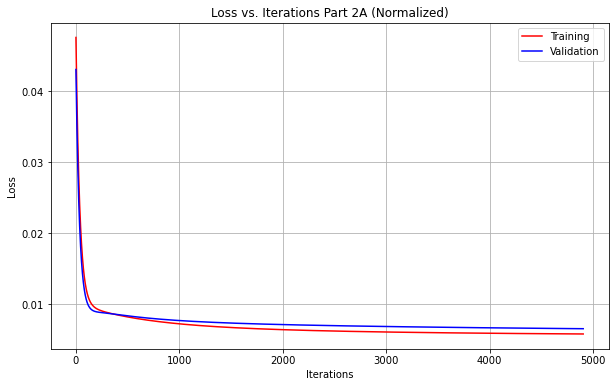

In [14]:
#Linear Regression for Q2A (Normalized)
thetaA = np.zeros(6)
iterations_limA = 10000
alphaA = 0.01
thresholdA = .00003

thetaA, cost_historyA, iterateA, validation_historyA = new_gradient_descent(xA, yA, xAv, yAv, thetaA, alphaA, iterations_limA, thresholdA, m, k)
print('Thetas for Question 2 Part A (Normalized) model =', thetaA)
#print('cost_history for the first variable =', cost_historyA)
print('Final number of iterations =', iterateA, "\n")
#print(len(cost_history01.transpose()))

# Plotting the first variable of the training data with its regression line
plt.plot(range(1, iterateA + 1), cost_historyA.transpose(), color='red',label='Training')
plt.plot(range(1, iterateA + 1), validation_historyA.transpose(), color='blue',label='Validation')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations Part 2A (Normalized)')
plt.legend()

In [15]:
#Question 2 Part B Normalized

scaler1 = MinMaxScaler()
df_NewtrainB[num_vars] = scaler1.fit_transform(df_NewtrainB[num_vars])
df_NewtestB[num_vars] = scaler1.transform(df_NewtestB[num_vars])

#Training Data:
x1B = df_NewtrainB.values[:, 0] # get input values for area
x2B = df_NewtrainB.values[:, 1] # get input values for bedrooms
x3B = df_NewtrainB.values[:, 2] # get input values for bathroom
x4B = df_NewtrainB.values[:, 3] # get input values for stories
x5B = df_NewtrainB.values[:, 4] # get input values for mainroad
x6B = df_NewtrainB.values[:, 5] # get input values for guestroom
x7B = df_NewtrainB.values[:, 6] # get input values for basement
x8B = df_NewtrainB.values[:, 7] # get input values for hotwaterheating
x9B = df_NewtrainB.values[:, 8] # get input values for airconditioning
x10B = df_NewtrainB.values[:, 9] # get input values for parking
x11B = df_NewtrainB.values[:, 10] # get input values for prefarea
yB = df_NewtrainB.values[:, 11] # get output values (price)
print(df_NewtrainB.head(), "\n")

#Reshaping and adding a column of ones to represent the "variable" multiplied against theta0 for each input
X_0B = np.ones((m, 1))
X_1B = x1B.reshape(m, 1)
X_2B = x2B.reshape(m, 1)
X_3B = x3B.reshape(m, 1)
X_4B = x4B.reshape(m, 1)
X_5B = x5B.reshape(m, 1)
X_6B = x6B.reshape(m, 1)
X_7B = x7B.reshape(m, 1)
X_8B = x8B.reshape(m, 1)
X_9B = x9B.reshape(m, 1)
X_10B = x10B.reshape(m, 1)
X_11B = x11B.reshape(m, 1)
xB = np.hstack((X_0B, X_1B, X_2B, X_3B, X_4B, X_5B, X_6B, X_7B, X_8B, X_9B, X_10B, X_11B))
print(xB, "\n")

#Validation Data:
x1Bv = df_NewtestB.values[:, 0] # get input values for area
x2Bv = df_NewtestB.values[:, 1] # get input values for bedrooms
x3Bv = df_NewtestB.values[:, 2] # get input values for bathroom
x4Bv = df_NewtestB.values[:, 3] # get input values for stories
x5Bv = df_NewtestB.values[:, 4] # get input values for mainroad
x6Bv = df_NewtestB.values[:, 5] # get input values for guestroom
x7Bv = df_NewtestB.values[:, 6] # get input values for basement
x8Bv = df_NewtestB.values[:, 7] # get input values for hotwaterheating
x9Bv = df_NewtestB.values[:, 8] # get input values for airconditioning
x10Bv = df_NewtestB.values[:, 9] # get input values for parking
x11Bv = df_NewtestB.values[:, 10] # get input values for prefarea
yBv = df_NewtestB.values[:, 11] # get output values (price)
print(df_NewtestB.head(), "\n")

#Reshaping and adding a column of ones to represent the "variable" multiplied against theta0 for each input
X_0Bv = np.ones((k, 1))
X_1Bv = x1Bv.reshape(k, 1)
X_2Bv = x2Bv.reshape(k, 1)
X_3Bv = x3Bv.reshape(k, 1)
X_4Bv = x4Bv.reshape(k, 1)
X_5Bv = x5Bv.reshape(k, 1)
X_6Bv = x6Bv.reshape(k, 1)
X_7Bv = x7Bv.reshape(k, 1)
X_8Bv = x8Bv.reshape(k, 1)
X_9Bv = x9Bv.reshape(k, 1)
X_10Bv = x10Bv.reshape(k, 1)
X_11Bv = x11Bv.reshape(k, 1)
xBv = np.hstack((X_0Bv, X_1Bv, X_2Bv, X_3Bv, X_4Bv, X_5Bv, X_6Bv, X_7Bv, X_8Bv, X_9Bv, X_10Bv, X_11Bv))
print(xBv, "\n")

         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
286  0.066207       0.4   0.000000  0.000000         1          0         1   
477  0.217488       0.2   0.000000  0.000000         1          0         0   
33   0.287107       0.4   0.666667  0.333333         1          1         1   
475  0.081036       0.2   0.000000  0.333333         1          0         0   
104  0.255082       0.4   0.333333  0.000000         1          1         1   

     hotwaterheating  airconditioning   parking  prefarea     price  
286                0                0  0.000000         1  0.215152  
477                0                0  0.000000         0  0.103030  
33                 0                0  0.333333         0  0.557576  
475                0                0  0.000000         0  0.104848  
104                0                0  0.666667         1  0.384848   

[[1.         0.06620718 0.4        ... 0.         0.         1.        ]
 [1.         0.21748816 0.2   

Thetas for Question 2 Part B (Normalized) model = [0.05048416 0.08561491 0.06384093 0.08639695 0.11071189 0.06006285
 0.03654417 0.03343088 0.02944444 0.09011485 0.08734962 0.05967977]
Final number of iterations = 1027 



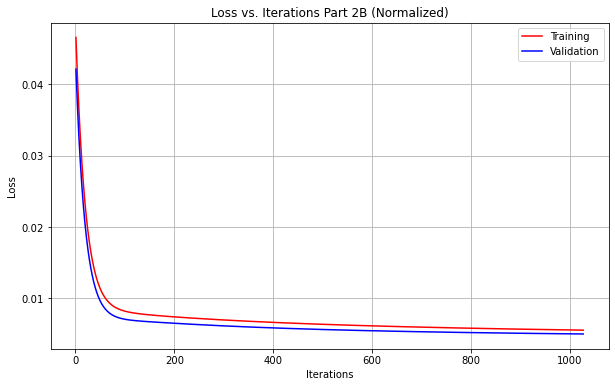

In [16]:
#Linear Regression for Q2B (Normalized)
thetaB = np.zeros(12)
iterations_limB = 10000
alphaB = 0.01
thresholdB = .0001

thetaB, cost_historyB, iterateB, validation_historyB = new_gradient_descent(xB, yB, xBv, yBv, thetaB, alphaB, iterations_limB, thresholdB, m, k)
print('Thetas for Question 2 Part B (Normalized) model =', thetaB)
#print('cost_history for the first variable =', cost_historyA)
print('Final number of iterations =', iterateB, "\n")
#print(len(cost_history01.transpose()))

# Plotting the first variable of the training data with its regression line
plt.plot(range(1, iterateB + 1), cost_historyB.transpose(), color='red',label='Training')
plt.plot(range(1, iterateB + 1), validation_historyB.transpose(), color='blue',label='Validation')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations Part 2B (Normalized)')
plt.legend()

In [17]:
#Question 2 Part A Standardized

scaler1 = StandardScaler()
df_Newtrain[num_vars] = scaler1.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = scaler1.transform(df_Newtest[num_vars])

#Training Data:
print("Training data and matrix: ", '\n]')
x1A = df_Newtrain.values[:, 0] # get input values for area
x2A = df_Newtrain.values[:, 1] # get input values for bedrooms
x3A = df_Newtrain.values[:, 2] # get input values for bathroom
x4A = df_Newtrain.values[:, 3] # get input values for stories
x5A = df_Newtrain.values[:, 4] # get input values for parking
yA = df_Newtrain.values[:, 5] # get output values (price)
print(df_Newtrain.head(), "\n")

#Reshaping and adding a column of ones to represent the "variable" multiplied against theta0 for each input
X_0A = np.ones((m, 1))
X_1A = x1A.reshape(m, 1)
X_2A = x2A.reshape(m, 1)
X_3A = x3A.reshape(m, 1)
X_4A = x4A.reshape(m, 1)
X_5A = x5A.reshape(m, 1)
xA = np.hstack((X_0A, X_1A, X_2A, X_3A, X_4A, X_5A))
print(xA, "\n")

#Validation Data:
print("Validation data and matrix: ", '\n]')
x1Av = df_Newtest.values[:, 0] # get input values for area
x2Av = df_Newtest.values[:, 1] # get input values for bedrooms
x3Av = df_Newtest.values[:, 2] # get input values for bathroom
x4Av = df_Newtest.values[:, 3] # get input values for stories
x5Av = df_Newtest.values[:, 4] # get input values for parking
yAv = df_Newtest.values[:, 5] # get output values (price)
print(df_Newtest.head(), "\n")

#Reshaping and adding a column of ones to represent the "variable" multiplied against theta0 for each input
X_0Av = np.ones((k, 1))
X_1Av = x1Av.reshape(k, 1)
X_2Av = x2Av.reshape(k, 1)
X_3Av = x3Av.reshape(k, 1)
X_4Av = x4Av.reshape(k, 1)
X_5Av = x5Av.reshape(k, 1)
xAv = np.hstack((X_0Av, X_1Av, X_2Av, X_3Av, X_4Av, X_5Av))
print(xAv, "\n")

Training data and matrix:  
]
         area  bedrooms  bathrooms   stories   parking     price
286 -1.126526  0.067811  -0.574446 -0.884736 -0.795246 -0.301296
477 -0.120214 -1.291984  -0.574446 -0.884736 -0.795246 -0.982850
33   0.342885  0.067811   3.404897  0.238879  0.388304  1.780207
475 -1.027886 -1.291984  -0.574446  0.238879 -0.795246 -0.971797
104  0.129860  0.067811   1.415226 -0.884736  1.571853  0.730245 

[[ 1.         -1.12652618  0.06781132 -0.57444582 -0.88473637 -0.79524584]
 [ 1.         -0.12021352 -1.29198403 -0.57444582 -0.88473637 -0.79524584]
 [ 1.          0.34288481  0.06781132  3.40489704  0.23887882  0.38830363]
 ...
 [ 1.         -0.59720479 -1.29198403 -0.57444582 -0.88473637 -0.79524584]
 [ 1.         -0.65740758  0.06781132 -0.57444582  0.23887882  0.38830363]
 [ 1.          0.47903571  1.42760666  1.41522561 -0.88473637  0.38830363]] 

Validation data and matrix:  
]
         area  bedrooms  bathrooms   stories   parking     price
489 -0.888957  0.067811

Thetas for Question 2 Part A (Standardized) model = [9.85592477e-17 3.77566517e-01 8.72633783e-02 2.69802204e-01
 2.73418122e-01 1.98202363e-01]
Final number of iterations = 1004 



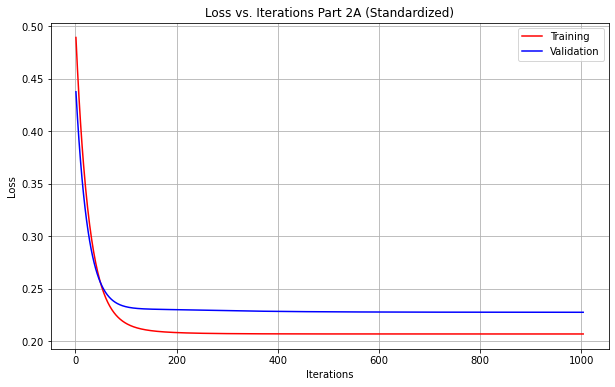

In [18]:
#Linear Regression for Q2A (Standardized)
thetaA = np.zeros(6)
iterations_limA = 10000
alphaA = 0.01
thresholdA = .000003

thetaA, cost_historyA, iterateA, validation_historyA = new_gradient_descent(xA, yA, xAv, yAv, thetaA, alphaA, iterations_limA, thresholdA, m, k)
print('Thetas for Question 2 Part A (Standardized) model =', thetaA)
#print('cost_history for the first variable =', cost_historyA)
print('Final number of iterations =', iterateA, "\n")
#print(len(cost_history01.transpose()))

# Plotting the first variable of the training data with its regression line
plt.plot(range(1, iterateA + 1), cost_historyA.transpose(), color='red',label='Training')
plt.plot(range(1, iterateA + 1), validation_historyA.transpose(), color='blue',label='Validation')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations Part 2A (Standardized)')
plt.legend()

In [19]:
#Question 2 Part B Standardized

scaler1 = StandardScaler()
df_NewtrainB[num_vars] = scaler1.fit_transform(df_NewtrainB[num_vars])
df_NewtestB[num_vars] = scaler1.transform(df_NewtestB[num_vars])

#Training Data:
x1B = df_NewtrainB.values[:, 0] # get input values for area
x2B = df_NewtrainB.values[:, 1] # get input values for bedrooms
x3B = df_NewtrainB.values[:, 2] # get input values for bathroom
x4B = df_NewtrainB.values[:, 3] # get input values for stories
x5B = df_NewtrainB.values[:, 4] # get input values for mainroad
x6B = df_NewtrainB.values[:, 5] # get input values for guestroom
x7B = df_NewtrainB.values[:, 6] # get input values for basement
x8B = df_NewtrainB.values[:, 7] # get input values for hotwaterheating
x9B = df_NewtrainB.values[:, 8] # get input values for airconditioning
x10B = df_NewtrainB.values[:, 9] # get input values for parking
x11B = df_NewtrainB.values[:, 10] # get input values for prefarea
yB = df_NewtrainB.values[:, 11] # get output values (price)
print(df_NewtrainB.head(), "\n")

#Reshaping and adding a column of ones to represent the "variable" multiplied against theta0 for each input
X_0B = np.ones((m, 1))
X_1B = x1B.reshape(m, 1)
X_2B = x2B.reshape(m, 1)
X_3B = x3B.reshape(m, 1)
X_4B = x4B.reshape(m, 1)
X_5B = x5B.reshape(m, 1)
X_6B = x6B.reshape(m, 1)
X_7B = x7B.reshape(m, 1)
X_8B = x8B.reshape(m, 1)
X_9B = x9B.reshape(m, 1)
X_10B = x10B.reshape(m, 1)
X_11B = x11B.reshape(m, 1)
xB = np.hstack((X_0B, X_1B, X_2B, X_3B, X_4B, X_5B, X_6B, X_7B, X_8B, X_9B, X_10B, X_11B))
print(xB, "\n")

#Validation Data:
x1Bv = df_NewtestB.values[:, 0] # get input values for area
x2Bv = df_NewtestB.values[:, 1] # get input values for bedrooms
x3Bv = df_NewtestB.values[:, 2] # get input values for bathroom
x4Bv = df_NewtestB.values[:, 3] # get input values for stories
x5Bv = df_NewtestB.values[:, 4] # get input values for mainroad
x6Bv = df_NewtestB.values[:, 5] # get input values for guestroom
x7Bv = df_NewtestB.values[:, 6] # get input values for basement
x8Bv = df_NewtestB.values[:, 7] # get input values for hotwaterheating
x9Bv = df_NewtestB.values[:, 8] # get input values for airconditioning
x10Bv = df_NewtestB.values[:, 9] # get input values for parking
x11Bv = df_NewtestB.values[:, 10] # get input values for prefarea
yBv = df_NewtestB.values[:, 11] # get output values (price)
print(df_NewtestB.head(), "\n")

#Reshaping and adding a column of ones to represent the "variable" multiplied against theta0 for each input
X_0Bv = np.ones((k, 1))
X_1Bv = x1Bv.reshape(k, 1)
X_2Bv = x2Bv.reshape(k, 1)
X_3Bv = x3Bv.reshape(k, 1)
X_4Bv = x4Bv.reshape(k, 1)
X_5Bv = x5Bv.reshape(k, 1)
X_6Bv = x6Bv.reshape(k, 1)
X_7Bv = x7Bv.reshape(k, 1)
X_8Bv = x8Bv.reshape(k, 1)
X_9Bv = x9Bv.reshape(k, 1)
X_10Bv = x10Bv.reshape(k, 1)
X_11Bv = x11Bv.reshape(k, 1)
xBv = np.hstack((X_0Bv, X_1Bv, X_2Bv, X_3Bv, X_4Bv, X_5Bv, X_6Bv, X_7Bv, X_8Bv, X_9Bv, X_10Bv, X_11Bv))
print(xBv, "\n")

         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
286 -1.126526  0.067811  -0.574446 -0.884736         1          0         1   
477 -0.120214 -1.291984  -0.574446 -0.884736         1          0         0   
33   0.342885  0.067811   3.404897  0.238879         1          1         1   
475 -1.027886 -1.291984  -0.574446  0.238879         1          0         0   
104  0.129860  0.067811   1.415226 -0.884736         1          1         1   

     hotwaterheating  airconditioning   parking  prefarea     price  
286                0                0 -0.795246         1 -0.301296  
477                0                0 -0.795246         0 -0.982850  
33                 0                0  0.388304         0  1.780207  
475                0                0 -0.795246         0 -0.971797  
104                0                0  1.571853         1  0.730245   

[[ 1.         -1.12652618  0.06781132 ...  0.         -0.79524584
   1.        ]
 [ 1.         -0.12021

Thetas for Question 2 Part B (Standardized) model = [-0.53445577  0.30189762  0.06614354  0.23985746  0.24674104  0.2372135
  0.13424859  0.22907969  0.42947915  0.41389542  0.14737026  0.29652585]
Final number of iterations = 10000 



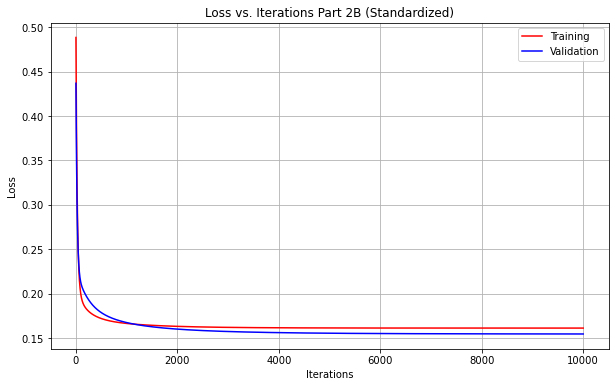

In [20]:
#Linear Regression for Q2B (Standardized)
thetaB = np.zeros(12)
iterations_limB = 10000
alphaB = 0.01
lamdaB = 0.01
thresholdB = .000003

thetaB, cost_historyB, iterateB, validation_historyB = new_gradient_descent(xB, yB, xBv, yBv, thetaB, alphaB, iterations_limB, thresholdB, m, k)
print('Thetas for Question 2 Part B (Standardized) model =', thetaB)
#print('cost_history for the first variable =', cost_historyA)
print('Final number of iterations =', iterateB, "\n")
#print(len(cost_history01.transpose()))

# Plotting the first variable of the training data with its regression line
plt.plot(range(1, iterateB + 1), cost_historyB.transpose(), color='red',label='Training')
plt.plot(range(1, iterateB + 1), validation_historyB.transpose(), color='blue',label='Validation')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations Part 2B (Standardized)')
plt.legend()

In [21]:
#Question 3 Part A Normalized

scaler1 = MinMaxScaler()
df_Newtrain[num_vars] = scaler1.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = scaler1.transform(df_Newtest[num_vars])

#Training Data:
x1A = df_Newtrain.values[:, 0] # get input values for area
x2A = df_Newtrain.values[:, 1] # get input values for bedrooms
x3A = df_Newtrain.values[:, 2] # get input values for bathroom
x4A = df_Newtrain.values[:, 3] # get input values for stories
x5A = df_Newtrain.values[:, 4] # get input values for parking
yA = df_Newtrain.values[:, 5] # get output values (price)
print(df_Newtrain.head(), "\n")

#Reshaping and adding a column of ones to represent the "variable" multiplied against theta0 for each input
X_0A = np.ones((m, 1))
X_1A = x1A.reshape(m, 1)
X_2A = x2A.reshape(m, 1)
X_3A = x3A.reshape(m, 1)
X_4A = x4A.reshape(m, 1)
X_5A = x5A.reshape(m, 1)
xA = np.hstack((X_0A, X_1A, X_2A, X_3A, X_4A, X_5A))
print(xA, "\n")

#Validation Data:
x1Av = df_Newtest.values[:, 0] # get input values for area
x2Av = df_Newtest.values[:, 1] # get input values for bedrooms
x3Av = df_Newtest.values[:, 2] # get input values for bathroom
x4Av = df_Newtest.values[:, 3] # get input values for stories
x5Av = df_Newtest.values[:, 4] # get input values for parking
yAv = df_Newtest.values[:, 5] # get output values (price)
print(df_Newtest.head(), "\n")

#Reshaping and adding a column of ones to represent the "variable" multiplied against theta0 for each input
X_0Av = np.ones((k, 1))
X_1Av = x1Av.reshape(k, 1)
X_2Av = x2Av.reshape(k, 1)
X_3Av = x3Av.reshape(k, 1)
X_4Av = x4Av.reshape(k, 1)
X_5Av = x5Av.reshape(k, 1)
xAv = np.hstack((X_0Av, X_1Av, X_2Av, X_3Av, X_4Av, X_5Av))
print(xAv, "\n")

         area  bedrooms  bathrooms   stories   parking     price
286  0.066207       0.4   0.000000  0.000000  0.000000  0.215152
477  0.217488       0.2   0.000000  0.000000  0.000000  0.103030
33   0.287107       0.4   0.666667  0.333333  0.333333  0.557576
475  0.081036       0.2   0.000000  0.333333  0.000000  0.104848
104  0.255082       0.4   0.333333  0.000000  0.666667  0.384848 

[[1.         0.06620718 0.4        0.         0.         0.        ]
 [1.         0.21748816 0.2        0.         0.         0.        ]
 [1.         0.28710666 0.4        0.66666667 0.33333333 0.33333333]
 ...
 [1.         0.14578112 0.2        0.         0.         0.        ]
 [1.         0.13673072 0.4        0.         0.33333333 0.33333333]
 [1.         0.30757449 0.6        0.33333333 0.         0.33333333]] 

         area  bedrooms  bathrooms   stories   parking     price
489  0.101921       0.4   0.000000  0.333333  0.333333  0.093939
302  0.021512       0.4   0.000000  0.666667  0.333333  

Thetas for Question 3 Part A (Normalized) model = [0.05899674 0.27927315 0.10947595 0.21391541 0.166449   0.14979356]
Final number of iterations = 4899 



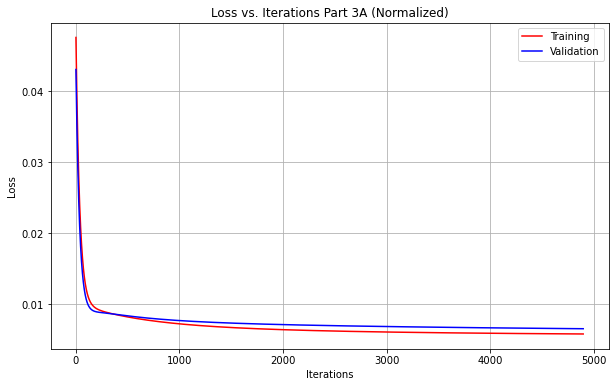

In [34]:
#Question 3 Part A
    #Normalization was chosen
    
#Linear Regression
thetaA = np.zeros(6)
iterations_limA = 10000
alphaA = 0.01
lamdaA = 0.01
thresholdA = .00003

thetaA, cost_historyA, iterateA, validation_historyA = regularized_gradient_descent(xA, yA, xAv, yAv, thetaA, alphaA, iterations_limA, thresholdA, m, k, lamdaA)
print('Thetas for Question 3 Part A (Normalized) model =', thetaA)
#print('cost_history for the first variable =', cost_historyA)
print('Final number of iterations =', iterateA, "\n")
#print(len(cost_history01.transpose()))

# Plotting the first variable of the training data with its regression line
plt.plot(range(1, iterateA + 1), cost_historyA.transpose(), color='red',label='Training')
plt.plot(range(1, iterateA + 1), validation_historyA.transpose(), color='blue',label='Validation')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations Part 3A (Normalized)')
plt.legend()

In [23]:
#Question 3 Part B Normalized

scaler1 = MinMaxScaler()
df_NewtrainB[num_vars] = scaler1.fit_transform(df_NewtrainB[num_vars])
df_NewtestB[num_vars] = scaler1.transform(df_NewtestB[num_vars])

#Training Data:
x1B = df_NewtrainB.values[:, 0] # get input values for area
x2B = df_NewtrainB.values[:, 1] # get input values for bedrooms
x3B = df_NewtrainB.values[:, 2] # get input values for bathroom
x4B = df_NewtrainB.values[:, 3] # get input values for stories
x5B = df_NewtrainB.values[:, 4] # get input values for mainroad
x6B = df_NewtrainB.values[:, 5] # get input values for guestroom
x7B = df_NewtrainB.values[:, 6] # get input values for basement
x8B = df_NewtrainB.values[:, 7] # get input values for hotwaterheating
x9B = df_NewtrainB.values[:, 8] # get input values for airconditioning
x10B = df_NewtrainB.values[:, 9] # get input values for parking
x11B = df_NewtrainB.values[:, 10] # get input values for prefarea
yB = df_NewtrainB.values[:, 11] # get output values (price)
print(df_NewtrainB.head(), "\n")

#Reshaping and adding a column of ones to represent the "variable" multiplied against theta0 for each input
X_0B = np.ones((m, 1))
X_1B = x1B.reshape(m, 1)
X_2B = x2B.reshape(m, 1)
X_3B = x3B.reshape(m, 1)
X_4B = x4B.reshape(m, 1)
X_5B = x5B.reshape(m, 1)
X_6B = x6B.reshape(m, 1)
X_7B = x7B.reshape(m, 1)
X_8B = x8B.reshape(m, 1)
X_9B = x9B.reshape(m, 1)
X_10B = x10B.reshape(m, 1)
X_11B = x11B.reshape(m, 1)
xB = np.hstack((X_0B, X_1B, X_2B, X_3B, X_4B, X_5B, X_6B, X_7B, X_8B, X_9B, X_10B, X_11B))
print(xB, "\n")

#Validation Data:
x1Bv = df_NewtestB.values[:, 0] # get input values for area
x2Bv = df_NewtestB.values[:, 1] # get input values for bedrooms
x3Bv = df_NewtestB.values[:, 2] # get input values for bathroom
x4Bv = df_NewtestB.values[:, 3] # get input values for stories
x5Bv = df_NewtestB.values[:, 4] # get input values for mainroad
x6Bv = df_NewtestB.values[:, 5] # get input values for guestroom
x7Bv = df_NewtestB.values[:, 6] # get input values for basement
x8Bv = df_NewtestB.values[:, 7] # get input values for hotwaterheating
x9Bv = df_NewtestB.values[:, 8] # get input values for airconditioning
x10Bv = df_NewtestB.values[:, 9] # get input values for parking
x11Bv = df_NewtestB.values[:, 10] # get input values for prefarea
yBv = df_NewtestB.values[:, 11] # get output values (price)
print(df_NewtestB.head(), "\n")

#Reshaping and adding a column of ones to represent the "variable" multiplied against theta0 for each input
X_0Bv = np.ones((k, 1))
X_1Bv = x1Bv.reshape(k, 1)
X_2Bv = x2Bv.reshape(k, 1)
X_3Bv = x3Bv.reshape(k, 1)
X_4Bv = x4Bv.reshape(k, 1)
X_5Bv = x5Bv.reshape(k, 1)
X_6Bv = x6Bv.reshape(k, 1)
X_7Bv = x7Bv.reshape(k, 1)
X_8Bv = x8Bv.reshape(k, 1)
X_9Bv = x9Bv.reshape(k, 1)
X_10Bv = x10Bv.reshape(k, 1)
X_11Bv = x11Bv.reshape(k, 1)
xBv = np.hstack((X_0Bv, X_1Bv, X_2Bv, X_3Bv, X_4Bv, X_5Bv, X_6Bv, X_7Bv, X_8Bv, X_9Bv, X_10Bv, X_11Bv))
print(xBv, "\n")

         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
286  0.066207       0.4   0.000000  0.000000         1          0         1   
477  0.217488       0.2   0.000000  0.000000         1          0         0   
33   0.287107       0.4   0.666667  0.333333         1          1         1   
475  0.081036       0.2   0.000000  0.333333         1          0         0   
104  0.255082       0.4   0.333333  0.000000         1          1         1   

     hotwaterheating  airconditioning   parking  prefarea     price  
286                0                0  0.000000         1  0.215152  
477                0                0  0.000000         0  0.103030  
33                 0                0  0.333333         0  0.557576  
475                0                0  0.000000         0  0.104848  
104                0                0  0.666667         1  0.384848   

[[1.         0.06620718 0.4        ... 0.         0.         1.        ]
 [1.         0.21748816 0.2   

Thetas for Question 3 Part B (Normalized) model = [0.010045   0.19110856 0.0844005  0.17806323 0.14610528 0.043275
 0.03049728 0.03447795 0.06115055 0.07439266 0.11469461 0.05903862]
Final number of iterations = 4148 



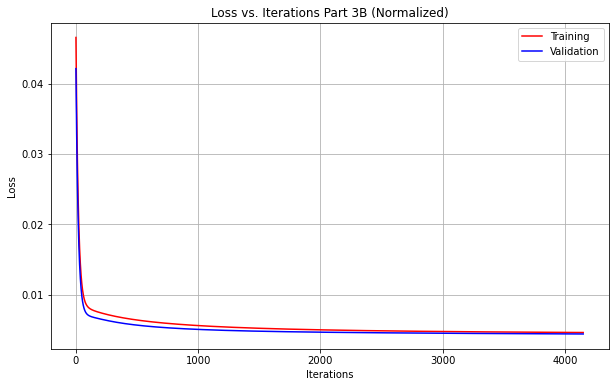

In [33]:
#Question 3 Part B
    #Normalization was chosen
    
#Linear Regression
thetaB = np.zeros(12)
iterations_limB = 10000
alphaB = 0.01
lamdaB = 0.01
thresholdB = .00003

thetaB, cost_historyB, iterateB, validation_historyB = regularized_gradient_descent(xB, yB, xBv, yBv, thetaB, alphaB, iterations_limB, thresholdB, m, k, lamdaB)
print('Thetas for Question 3 Part B (Normalized) model =', thetaB)
#print('cost_history for the first variable =', cost_historyA)
print('Final number of iterations =', iterateB, "\n")
#print(len(cost_history01.transpose()))

# Plotting the first variable of the training data with its regression line
plt.plot(range(1, iterateB + 1), cost_historyB.transpose(), color='red',label='Training')
plt.plot(range(1, iterateB + 1), validation_historyB.transpose(), color='blue',label='Validation')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations Part 3B (Normalized)')
plt.legend()